### Load Libraries

In [322]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
%matplotlib inline

### Read in Data

In [243]:
nyc_copy = pd.read_csv('nyc_copy.csv')
nyc_copy.shape

(38511, 16)

In [264]:
# Function to create and set categories:
# def price(col):
    
#     if col['price'] > 175:
#         category = 1
#     else: 
#         category = 0
#     return category

In [270]:
# We want to apply the function only to the data where the listings are below $300
# nyc_test = nyc_copy[nyc_copy['price'] <= 300]

In [271]:
# nyc_test.loc['category'] = nyc_test.apply(price, axis = 1)

In [272]:
# Create a new category that is either 1 or 0 depending on how much the price of the listing is
# 1 = low, 0 = high
nyc_price = nyc_copy.loc[(nyc_copy['price'] <= 300)]
nyc_price.loc[nyc_price['price'] > 175, 'Category'] = 0
nyc_price.loc[nyc_price['price'] <= 175, 'Category'] = 1

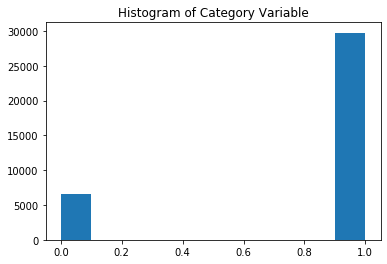

In [274]:
plt.hist(nyc_price['Category'])
plt.title("Histogram of Category Variable")
plt.show()

In [275]:
nyc_price.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,4.342945e-10,0.954243,2018-10-19,-0.677781,0.778151,2.562293,1.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,4.342945e-10,1.653213,2019-05-21,-0.420216,0.301030,2.550228,0.0


### Gather Data

In [276]:
# Trim to data of interest
vars_interest = pd.DataFrame(nyc_price, columns = ['Category','minimum_nights', 'number_of_reviews',
                                  'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
                                 'room_type', 'neighbourhood_group', 'neighbourhood'] )

# Convert to dummy variables 
# Get dummy variables for categorical data:
# neighbourhood may get removed since it's 200+ variables
vars_final = pd.get_dummies(vars_interest, columns= ['room_type','neighbourhood_group', 'neighbourhood'], drop_first = True)

In [277]:
# Prepare for regression
# Gather predictors 
X = vars_final.drop('Category', axis = 1)
X

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
0,4.342945e-10,9.542425e-01,-6.777807e-01,7.781513e-01,2.562293e+00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.342945e-10,1.653213e+00,-4.202164e-01,3.010300e-01,2.550228e+00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.342945e-10,2.431364e+00,6.665180e-01,4.342945e-10,2.287802e+00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000000e+00,9.542425e-01,-1.000000e+00,4.342945e-10,-9.000000e+00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.771213e-01,1.869232e+00,-2.291480e-01,4.342945e-10,2.110590e+00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38506,4.342945e-10,4.342945e-10,4.342945e-10,4.342945e-10,2.167317e+00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38507,4.342945e-10,4.342945e-10,4.342945e-10,7.781513e-01,2.530200e+00,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38508,4.342945e-10,4.342945e-10,4.342945e-10,4.342945e-10,1.939519e+00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,4.342945e-10,3.010300e-01,3.010300e-01,4.342945e-10,1.602060e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
# Gather predicted variable (price) and log transform it
y = pd.DataFrame(vars_final, columns = ['Category'])
y = y['Category']
y

0        1.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
38506    1.0
38507    1.0
38508    0.0
38509    1.0
38510    1.0
Name: Category, Length: 36348, dtype: float64

### Perform Logistic Regression

In [279]:
# Scale data
standardized_X = preprocessing.scale(X)

In [280]:
# Split data up into test and training sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.30, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [281]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [290]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 728 1243]
 [ 505 8429]]


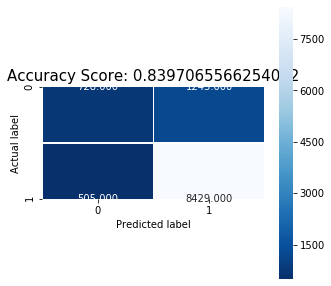

In [296]:
# plt.figure(figsize=(5,5))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(logreg.score(X_test,y_test))
# plt.title(all_sample_title, size = 15);

In [297]:
# Precision, recall, F-measure and support
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.37      0.45      1971
         1.0       0.87      0.94      0.91      8934

    accuracy                           0.84     10905
   macro avg       0.73      0.66      0.68     10905
weighted avg       0.82      0.84      0.82     10905



In [323]:
print("Precision score: {}".format(round(precision_score(y_test,y_pred),2)))
print("Recall score: {}".format(round(recall_score(y_test,y_pred),2)))
print("F1 score: {}".format(round(f1_score(y_test,y_pred),2)))

Precision score: 0.87
Recall score: 0.94
F1 score: 0.91


<Figure size 1080x1080 with 0 Axes>

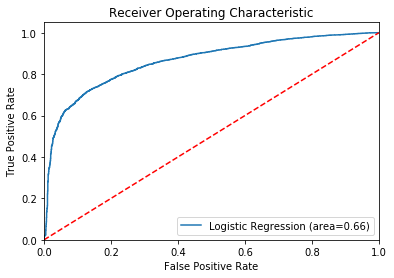

In [302]:
plt.figure(figsize=(15,15))
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr,tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In [189]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7725504067916519
0.7787253553415864
